# ☛ Problem Statement : 
As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc. 


# ≣ Objectives
The end objective of the participant is to come up with customer segmentations that take into account all the information that is presented in the dataset. The participant is expected to use NLP techniques to find similarity between the products. 

# ≣ Variables in the Dataset 

*   InvoiceNo : Invoice ID (object)
*   StockCode : Product ID (object)
*   Description : Product Details (object)
*   Quantity : Product quantity by purchase (int64)
*   InvoiceDate : Date of product purchased (object)
*   UnitPrice : Price at which each product is sold (float64)
*   CustomerID : Unique customer identification number (float64)
*   Country : Country where the product is purchased (object)


Importing Dependencies



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer


Uploading data

In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('/content/data.csv',encoding = 'unicode_escape')#,on_bad_lines='skip')
#invalid start byte error : UnicodeDecodeError, using encoding= 'unicode_escape' 

df.head() #Checking cols & rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# to check cols & rows in the data frame
df.shape

(541909, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes #variables

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.isnull().sum() #Checking for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Drop Null Values

In [ ]:
df.drop(["InvoiceNo"], axis = 1, inplace = True) #invoiceno will not help in further analysis so dropped it
df.dropna(subset = ["CustomerID"], axis = 0, inplace = True) #dropping null values from customerid
df=df.dropna()
df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.isnull().sum() #no null values found

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True) #dropping duplicates

In [ ]:
df.shape 

(401564, 7)

In [ ]:
df.Description.isnull().sum() #confirming no null values

0

In [ ]:
df['InvoiceDate']=df['InvoiceDate'].astype('datetime64[ns]') #Converting InvoiceDate to date time object
df['CustomerID']=df['CustomerID'].astype(int)
df

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df.Quantity.describe()

count    401564.000000
mean         12.183293
std         250.295275
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df.Quantity.min() #minimum product quantity cannot be less than 1

-80995

In [ ]:
#Replacing negative values with Mean in Quantity
df.loc[df.Quantity < 0,'Quantity']  = 12


In [ ]:
df.Quantity.describe()

count    401564.000000
mean         13.128346
std         179.580147
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df.UnitPrice.describe()

count    401564.000000
mean          3.474075
std          69.767499
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
sum(df.UnitPrice == 0) #Unit price has 0 

40

In [ ]:
#Replacing 0 values with Mean in UnitPrice
df.loc[df.UnitPrice ==0,'UnitPrice']  = 3.4

In [ ]:
df.UnitPrice.describe()

count    401564.000000
mean          3.474414
std          69.767491
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
sum(df.UnitPrice == 0) #Checking if UnitPrice still has 0 as a value
sum(df.UnitPrice <= 0)

0

In [ ]:
df = df.drop(labels=['StockCode'],axis=1) #Dropping stock code
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df['Description'].astype(str) #converting description to string

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401564, dtype: object

## Preprocessing data for NLP 
for description

In [ ]:
df['description_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")
df.sample(10) #checking difference between processed_description vs original description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
38,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583,France,CHARLOTTE BAG DOLLY GIRL DESIGN
488116,6 RIBBONS RUSTIC CHARM,2,2011-11-21 16:48:00,1.95,14030,United Kingdom,RIBBONS RUSTIC CHARM
475740,LUNCH BAG VINTAGE DOILY,1,2011-11-17 10:01:00,1.65,17461,United Kingdom,LUNCH BAG VINTAGE DOILY
155849,PARTY METAL SIGN,12,2011-04-14 11:07:00,1.45,17865,United Kingdom,PARTY METAL SIGN
275301,SET/10 RED POLKADOT PARTY CANDLES,24,2011-07-22 11:56:00,1.25,14426,United Kingdom,SET RED POLKADOT PARTY CANDLES
487595,PAPER CHAIN KIT 50'S CHRISTMAS,3,2011-11-21 15:57:00,2.95,16712,United Kingdom,PAPER CHAIN KIT S CHRISTMAS
458410,TRAVEL CARD WALLET VINTAGE TICKET,24,2011-11-11 11:37:00,0.42,12748,United Kingdom,TRAVEL CARD WALLET VINTAGE TICKET
415564,SET 12 COLOUR PENCILS SPACEBOY,3,2011-10-24 16:34:00,0.65,16023,United Kingdom,SET COLOUR PENCILS SPACEBOY
319798,RABBIT NIGHT LIGHT,288,2011-08-31 11:22:00,1.79,12678,France,RABBIT NIGHT LIGHT
489735,ADVENT CALENDAR GINGHAM SACK,6,2011-11-22 13:27:00,5.95,12705,Germany,ADVENT CALENDAR GINGHAM SACK


Replacing Shortwords

In [ ]:
df['description_processed'] = df['description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,WHITE HANGING HEART LIGHT HOLDER
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,PACK SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,CHILDREN APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
df['description_processed'] = [review.lower() for review in df['description_processed']] #converting description in to lower case
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart light holder
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart


#  Remove Stop words

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stopwords = stopwords.words('english')

add_words = ['set','design','heart','red','blue','pink','white','black','dark','pack','yellow','orange'] #custom list of words to be removed
# Adding to the list of words
stopwords.extend(add_words)

#to remove stop words
def remove_stopwords(rev):
  review_tokenized= word_tokenize(rev)
  rev_new = " ".join([i for i in review_tokenized if i not in stopwords])
  return rev_new

# Removing stopwords
df['description_processed'] = [remove_stopwords(r) for r in df['description_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,hanging light holder
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,woolly hottie


#### Lemmatization


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    #tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            if tag == wordnet.NOUN:
              lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)


df['description_processed'] = df['description_processed'].apply(lambda x: lemmatize_sentence(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Storing Description data in to another dataframe

In [ ]:
df1 = df["description_processed"].drop_duplicates() #dropping duplicates from the description data
df1 = pd.DataFrame(df1)
df1.head()

,description_processed
0,light holder
1,metal lantern
2,cream cupid heart coat hanger
3,union flag water bottle
4,


In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,light holder
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid heart coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,union flag water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,


In [ ]:
df.tail()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,spaceboy napkin
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,child
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens circus parade
541908,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,piece retrospot


Plotting frequent words

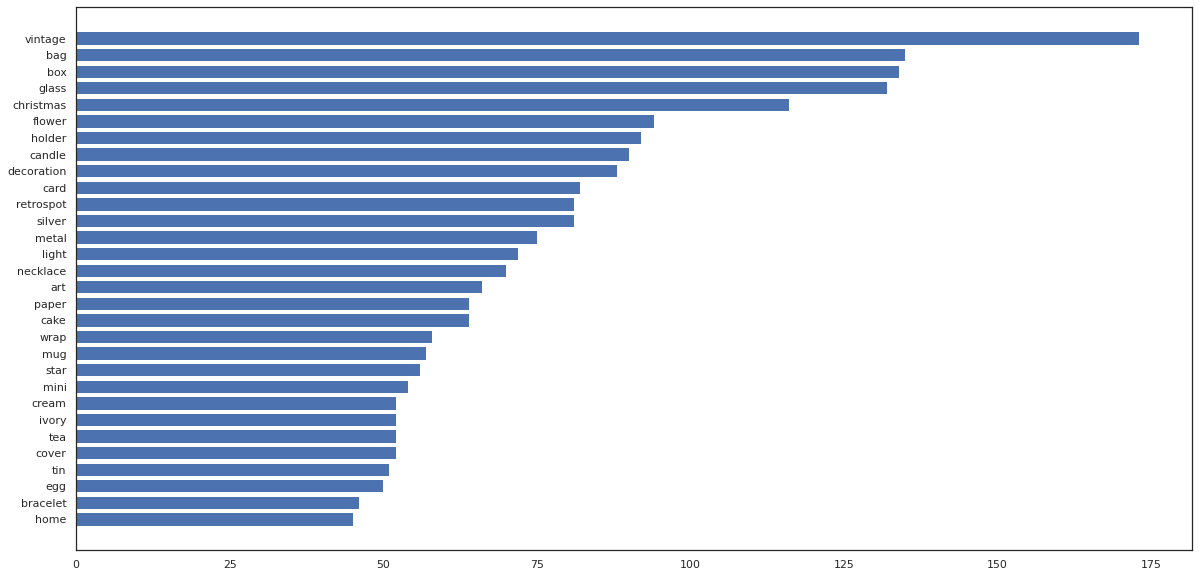

In [ ]:
#plotting most frequent words from the description using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df1['description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)


# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 
words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()


#### Word Cloud

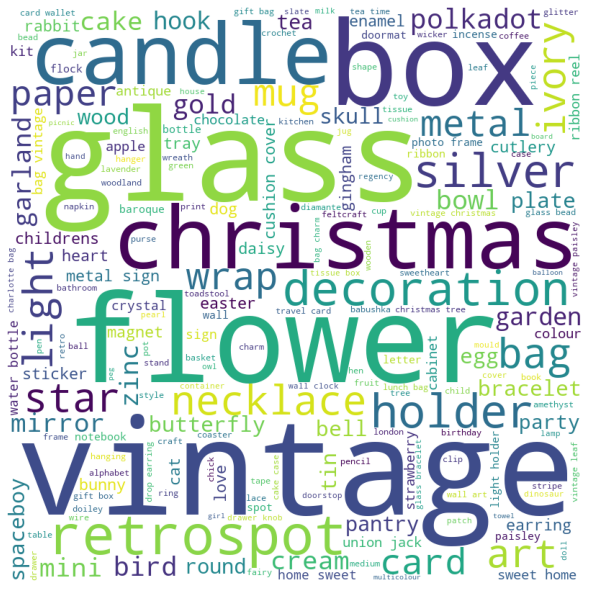

In [ ]:
from wordcloud import WordCloud # to build word cloud
all_words = ' '.join([text for text in df1['description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#### Bag of words Model


In [ ]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df1['description_processed']) 
# fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3 = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df3.head()


,acapulco,account,acrylic,address,adult,advent,ahoy,aid,air,airline,...,woodland,wool,word,work,world,wrap,wreath,xmas,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Building the ML model

KMeans Clustering

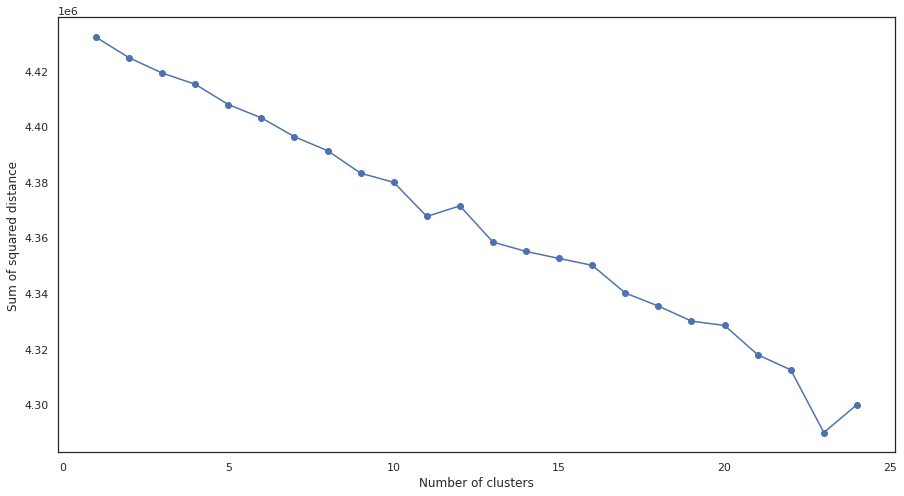

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()
X_scaled = sc.fit_transform(x)


#Elbow Plot
list_k = list(range(1, 25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot to see against k value
plt.figure(figsize=(15,8))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

In [ ]:
km = KMeans(n_clusters=18) # applying k = 18
km.fit(X_scaled) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points

In [ ]:
np.unique(km.labels_)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int32)

In [ ]:
label = km.fit_predict(X_scaled)  
print(label)

[3 3 3 ... 3 3 3]


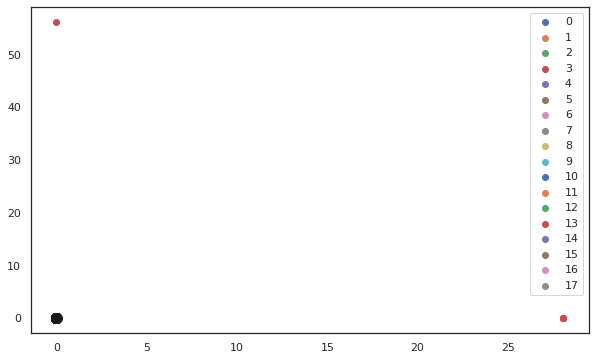

In [ ]:
centroids = km.cluster_centers_
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(X_scaled[label == i , 0] , X_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

In [ ]:
df3 = pd.DataFrame(km.labels_)
print(df3.shape)
df3

(3159, 1)


,0
0,3
1,3
2,3
3,3
4,3
...,...
3154,3
3155,3
3156,3
3157,3


In [ ]:
print(df1.shape)
df1

(3159, 1)


,description_processed
0,light holder
1,metal lantern
2,cream cupid heart coat hanger
3,union flag water bottle
4,
...,...
503375,snack tray vintage
504104,ribbon party
530382,skull phone charm
537621,cream holder


In [ ]:
df1 = df1.reset_index(drop=True)


In [ ]:
newdf = df1.join(df3)
print(newdf.shape)
newdf

(3159, 2)


,description_processed,0
0,light holder,3
1,metal lantern,3
2,cream cupid heart coat hanger,3
3,union flag water bottle,3
4,,3
...,...,...
3154,snack tray vintage,3
3155,ribbon party,3
3156,skull phone charm,3
3157,cream holder,3


In [ ]:
newdf.rename(columns={0:'clusters'},inplace=True) #renaming to clusters
newdf.head()

,description_processed,clusters
0,light holder,3
1,metal lantern,3
2,cream cupid heart coat hanger,3
3,union flag water bottle,3
4,,3


In [ ]:
DF = pd.merge(df, newdf, how='left', on='description_processed') #merging data frame
DF

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed,clusters
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,light holder,3
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern,3
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid heart coat hanger,3
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,union flag water bottle,3
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,,3
...,...,...,...,...,...,...,...,...
401559,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,spaceboy napkin,3
401560,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,child,3
401561,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens,3
401562,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens circus parade,3


Applying One Hot Encoding

In [ ]:
one_hot=pd.concat([DF, pd.get_dummies(DF["clusters"])],axis=1)
one_hot

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed,clusters,0,1,...,8,9,10,11,12,13,14,15,16,17
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,light holder,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,metal lantern,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid heart coat hanger,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,union flag water bottle,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,spaceboy napkin,3,0,0,...,0,0,0,0,0,0,0,0,0,0
401560,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,child,3,0,0,...,0,0,0,0,0,0,0,0,0,0
401561,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens,3,0,0,...,0,0,0,0,0,0,0,0,0,0
401562,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens circus parade,3,0,0,...,0,0,0,0,0,0,0,0,0,0


# Grouping by Customer ID

In [ ]:
one_hot.groupby(['CustomerID']).mean()


,Quantity,UnitPrice,clusters,0,1,2,3,4,5,6,...,8,9,10,11,12,13,14,15,16,17
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,37113.500000,1.040000,2.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
12347,13.505495,2.644011,2.983516,0.027473,0.0,0.010989,0.956044,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005495
12348,75.516129,5.764839,2.419355,0.193548,0.0,0.000000,0.806452,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
12349,8.643836,8.289041,2.794521,0.041096,0.0,0.082192,0.876712,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
12350,11.588235,3.841176,4.294118,0.117647,0.0,0.000000,0.764706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,4.500000,4.765000,2.900000,0.000000,0.0,0.100000,0.900000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
18281,7.714286,5.622857,3.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
18282,8.846154,4.821538,2.384615,0.153846,0.0,0.153846,0.692308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
one_hot.isnull().sum() #checking for null values

Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID               0
Country                  0
description_processed    0
clusters                 0
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
13                       0
14                       0
15                       0
16                       0
17                       0
dtype: int64

In [ ]:
df5=one_hot.drop(columns=['InvoiceDate','description_processed'])

df5=df5.reset_index(drop=True) #Dropping Invoicedate & description processed

In [ ]:
df5

,Description,Quantity,UnitPrice,CustomerID,Country,clusters,0,1,2,3,...,8,9,10,11,12,13,14,15,16,17
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401560,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401561,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
401562,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df5 = df5.drop(columns=['Description'],axis=1)
#dropping description

In [ ]:
df5=df5.reset_index(drop=True)
df5 #reset indexes

,Quantity,UnitPrice,CustomerID,Country,clusters,0,1,2,3,4,...,8,9,10,11,12,13,14,15,16,17
0,6,2.55,17850,United Kingdom,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3.39,17850,United Kingdom,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850,United Kingdom,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3.39,17850,United Kingdom,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850,United Kingdom,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,12,0.85,12680,France,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
401560,6,2.10,12680,France,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
401561,4,4.15,12680,France,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
401562,4,4.15,12680,France,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Label Encoding

Country

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df5['Country'])
df7=pd.DataFrame(Encode_coun,columns=['New_country'])
#df7=pd.get_dummies(df6['Country'])
df7

,New_country
0,35
1,35
2,35
3,35
4,35
...,...
401559,13
401560,13
401561,13
401562,13


In [ ]:
df7.isnull().sum()


New_country    0
dtype: int64

In [ ]:
df5 = pd.concat([df5,df7],axis=1)
df5.CustomerID = df5.CustomerID.astype(int) #Converting customerid to int
df5=df5.drop(columns=['Country','clusters']) #dropping country & cluster columns
df5

,Quantity,UnitPrice,CustomerID,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,New_country
0,6,2.55,17850,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,6,3.39,17850,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,8,2.75,17850,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35
3,6,3.39,17850,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,6,3.39,17850,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401559,12,0.85,12680,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401560,6,2.10,12680,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401561,4,4.15,12680,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13
401562,4,4.15,12680,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [ ]:
df5 = df5.dropna()


In [ ]:
df9=df5.groupby('CustomerID').mean() 
df9=df9.reset_index(drop=True)

In [ ]:
df9

,Quantity,UnitPrice,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,New_country
0,37113.500000,1.040000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
1,13.505495,2.644011,0.027473,0.0,0.010989,0.956044,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005495,16.0
2,75.516129,5.764839,0.193548,0.0,0.000000,0.806452,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,12.0
3,8.643836,8.289041,0.041096,0.0,0.082192,0.876712,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,18.0
4,11.588235,3.841176,0.117647,0.0,0.000000,0.764706,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.117647,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.000000,0.0,0.100000,0.900000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4368,7.714286,5.622857,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4369,8.846154,4.821538,0.153846,0.0,0.153846,0.692308,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4370,1.882108,1.628752,0.047157,0.0,0.009709,0.940361,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.002774,35.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_cus=en.fit_transform(df5['CustomerID'])
df10=pd.DataFrame(Encode_cus,columns=['Encode_cus'])

df10


,Encode_cus
0,4048
1,4048
2,4048
3,4048
4,4048
...,...
401559,275
401560,275
401561,275
401562,275


In [ ]:
#reset index, drop duplicates
df10=df10.reset_index(drop=True)
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10

,Encode_cus
0,4048
1,540
2,191
3,1047
4,2029
...,...
4367,823
4368,2346
4369,723
4370,1649


In [ ]:
df11=pd.concat([df10,df9],axis=1)
df11

,Encode_cus,Quantity,UnitPrice,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,New_country
0,4048,37113.500000,1.040000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
1,540,13.505495,2.644011,0.027473,0.0,0.010989,0.956044,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005495,16.0
2,191,75.516129,5.764839,0.193548,0.0,0.000000,0.806452,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,12.0
3,1047,8.643836,8.289041,0.041096,0.0,0.082192,0.876712,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,18.0
4,2029,11.588235,3.841176,0.117647,0.0,0.000000,0.764706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.117647,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,823,4.500000,4.765000,0.000000,0.0,0.100000,0.900000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4368,2346,7.714286,5.622857,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4369,723,8.846154,4.821538,0.153846,0.0,0.153846,0.692308,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,35.0
4370,1649,1.882108,1.628752,0.047157,0.0,0.009709,0.940361,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.002774,35.0


In [ ]:
val=df11.values


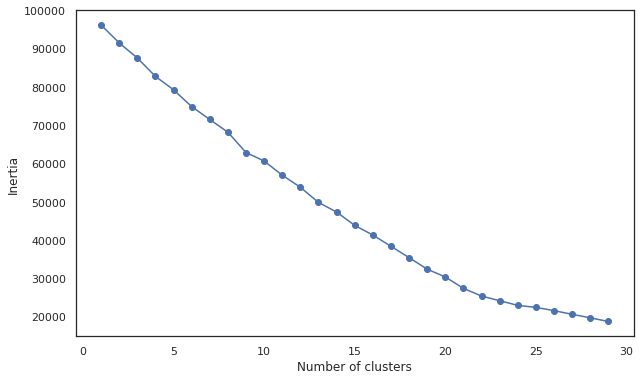

In [ ]:
#with scaling
scale=StandardScaler()
X=scale.fit_transform(val)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');

In [ ]:
km = KMeans(n_clusters=22)  #k value = 22
km.fit(X)

KMeans(n_clusters=22)

In [ ]:
cus_group=pd.DataFrame(km.labels_,columns=['customer_Group']) #grouping by customer
cus_group

,customer_Group
0,1
1,9
2,9
3,9
4,13
...,...
4367,2
4368,0
4369,2
4370,2


In [ ]:
f=pd.concat([df11['Encode_cus'],cus_group],axis=1)
f

,Encode_cus,customer_Group
0,4048,1
1,540,9
2,191,9
3,1047,9
4,2029,13
...,...,...
4367,823,2
4368,2346,0
4369,723,2
4370,1649,2


In [ ]:
import plotly.express as px
fig=px.scatter(f,x='Encode_cus',y='customer_Group')
fig.show()

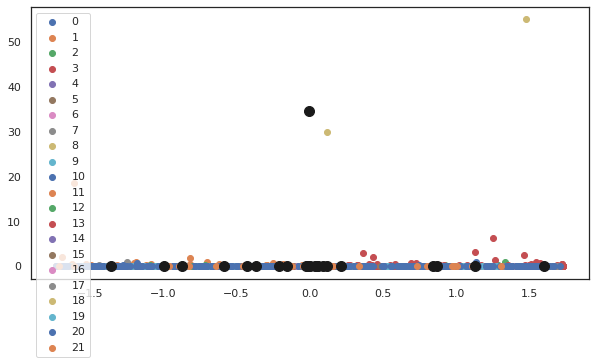

In [ ]:
#Getting the Centroids
centroids = km.cluster_centers_
label=km.fit_predict(X)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 5)) 
for i in labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()